### Prologue
Prepare the notebook for inline plotting<br>
Load require libraries<br>
Create custom functions<br>
Load and preprocess data<br>
Train a random forest using previously optimized/tuned hyper-parameters

In [109]:
from IPython.display import Image

%matplotlib inline

In [172]:
%run rf_analysis_utils.py

Utility code in the associated file performs the following steps:
defines function to print pretty confusion matrix: plot_confusion_matrix()
defines a function to get the class code by label: get_class_code()
defines a function to plot a tree inline: tree_to_code()
defines a function to extract all the structural arrays of a tree: get_tree_structure()
defines a function to extract a metrics dictionary from a random forest: explore_forest()
defines a function to pass batches of data to explore_forest(), split by correct/incorrect prediction: batch_analyse_model()
defines function to plot the mean path lengths from an object returned by explore_forest(): plot_mean_path_lengths()
defines a function to map the path of an instance down a tree: tree_path()
defines a function to map the path of an instance down a tree ensemble: forest_path()
defines a function to find the majority predicted class from object returned by forest_path(): major_class_from_forest_paths()
defines a function to conv

In [359]:
%run census_dataprep.py


Data Description:
This data was extracted from the census bureau database found at
http://www.census.gov/ftp/pub/DES/www/welcome.html
Donor: Ronny Kohavi and Barry Becker,
      Data Mining and Visualization
      Silicon Graphics.
      e-mail: ronnyk@sgi.com for questions.
Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
48842 instances, mix of continuous and discrete    (train=32561, test=16281)
45222 if instances with unknown values are removed (train=30162, test=15060)
Duplicate or conflicting instances : 6
Class probabilities for adult.all file
Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
Extraction was done by Barry Becker from the 1994 Census database.  A set of
 reasonably clean records was extracted using the following conditions:
 ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Utility code in the associated file performs the following steps:
set random seed 

In [358]:
# %run accident_dataprep.py

In [112]:
%run car_dataprep.py


M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for
multi-attribute decision making. In 8th Intl Workshop on Expert
Systems and their Applications, Avignon, France. pages 59-78, 1988.

Within machine-learning, this dataset was used for the evaluation
of HINT (Hierarchy INduction Tool), which was proved to be able to
completely reconstruct the original hierarchical model. This,
together with a comparison with C4.5, is presented in

B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by
function decomposition. ICML-97, Nashville, TN. 1997 (to appear)

Utility code in the associated file performs the following steps:
set random seed for the test_train_split
import packages and modules
defines a custom summary function: rstr()
create the list of variable names: var_names
create the list of features (var_names less class): features
import the car.csv file
create the pandas dataframe and prints head: car
create the categorical var encoder dictionary: le_dict
creat

In [227]:
# %run nursery_dataprep.py


Data Description:
Nursery Database was derived from a hierarchical decision model
originally developed to rank applications for nursery schools. It
was used during several years in 1980's when there was excessive
enrollment to these schools in Ljubljana, Slovenia, and the
rejected applications frequently needed an objective
explanation. The final decision depended on three subproblems:
occupation of parents and child's nursery, family structure and
financial standing, and social and health picture of the family.
The model was developed within expert system shell for decision
making DEX (M. Bohanec, V. Rajkovic: Expert system for decision
making. Sistemica 1(1), pp. 145-157, 1990.).

Utility code in the associated file performs the following steps:
set random seed for the test_train_split
import packages and modules
defines a custom summary function: rstr()
create the list of variable names: var_names
create the list of features (var_names less class): features
import the nursery.csv f

In [228]:
# get the correct directory for saved objects
pickle_dir_store = open("pickle_dir.pickle", "rb")
pickle_dir = pickle.load(pickle_dir_store)
pickle_dir_store.close()

# helper function for pickling files
def pickle_path(filename):
    return(pickle_dir + '\\' + filename)

# load up the training set (required because of running from script into Jup Note)
encoder_store = open(pickle_path('encoder.pickle'), "rb")
encoder = pickle.load(encoder_store)
encoder_store.close()

X_train_enc_store = open(pickle_path('X_train_enc.pickle'), "rb")
X_train_enc = pickle.load(X_train_enc_store)
X_train_enc_store.close()

y_train_store = open(pickle_path('y_train.pickle'), "rb")
y_train = pickle.load(y_train_store)
y_train_store.close()


In [229]:
%run rf_analysis_modelprep.py

Utility code in the associated file performs the following steps:
set random seed for the random forest
fetch the best parameters from model tuning results

Best OOB Cohen's Kappa during tuning: 0.9881
Best parameters: {'max_depth': 16, 'n_estimators': 1000, 'min_samples_leaf': 1}

Training a random forest model using best parameters... (please wait)

Done

Created helper function enc_model(). A pipeline: feature encoding -> rf model


Cohen's Kappa on unseen instances: 0.9883
Confusion matrix, without normalization
[[1308    0    0    0]
 [   0 1249   20    0]
 [   0    4 1210    0]
 [   0    7    0   90]]
Normalized confusion matrix
[[ 1.    0.    0.    0.  ]
 [ 0.    0.98  0.02  0.  ]
 [ 0.    0.    1.    0.  ]
 [ 0.    0.07  0.    0.93]]


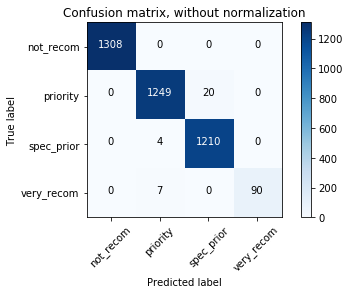

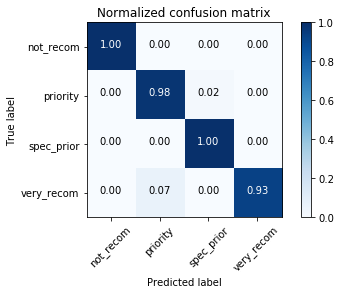

In [230]:
# test the model on unseen data
pred = enc_model.predict(X_test)
print("Cohen's Kappa on unseen instances: " "{:0.4f}".format(metrics.cohen_kappa_score(y_test, pred)))

# view the confusion matrix
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.figure()
# normalized confusion matrix
plot_confusion_matrix(cm
                      , classes=class_names
                      , normalize=True,
                      title='Normalized confusion matrix')


# Analysis of Random Forests by Decision Paths and Votes
This code uses the sci-kit learn object model to analyse a large tree ensemble trained over the dataset.

Currently only non-weighted trees are supported, so that rules out Boosted models, but a future version is intended to support weighted trees (weighted voting). 

Currently only categorical data is supported, so that rules out ExtraTrees, but a future version is intended to support ExtraTrees (random threshold selection).

This method relies on the stochastic process that selects the best split node at each split from a randomly selected restricted subspace.

## Open Questions
An optimally trained RF comes with a fixed set of hyper-parameters that should have been discovered by cross-validation or measuring OOB error over a search space of possible hyper-parameter values.

This method relies on the statistical analysis of a stochastic process, so it is expected that the method will yield more reliable results from a very large forest, one that is larger than the optimal number of estimators. The exact size may depend on data related measures, such as number of rows and number of features. The properties and bounds of these relationships are yet to be formalized.

Equally, there are other hyper-parameters relating to the node selection "m_try" and tree depth "max_depth", "max_leaf_nodes", "min_samples_split", "min_samples_leaf" etc. It is expected that these will have a significant effect on the method results and optimum setting for explanations may differ from optimum settings for prediction. These relationships and bounds should also be formalized.

# Part 1. Global Explanations
## Statistical Analysis of a random forest model using data batches
* Inductive Properties are based on the training data
* Transductive Properties are based on the test (held out) data
* In both cases, the whole dataset is passed into the model and statistics are gathered about how frequently the features are visited.

In [231]:
# First instantiate new survey class with the RF model
f_survey = forest_surveyor(model = rf, features = onehot_features, prediction_model = enc_model)

### Inductive

In [232]:
########################################################################
### This takes a few minutes, so only run when an update is required ###
########################################################################

if True:
    '''
    batch = X_train
    labels = y_train

    correct_preds = enc_model.predict(batch) == labels
    incorrect_preds = enc_model.predict(batch) != labels
    
    if sum(correct_preds) > 0:
        X = batch[correct_preds.values]
        y = labels[correct_preds.values]
        
        f_survey.fit(encoder.transform(X), y, onehot_features)
        f_cor_stats = f_survey.forest_stats(np.unique(y))
        
    if sum(incorrect_preds) > 0:
        X = batch[incorrect_preds.values]
        y = labels[incorrect_preds.values]
        
        f_survey.fit(encoder.transform(X), y, onehot_features)
        f_incor_stats = f_survey.forest_stats(np.unique(y))


    tr_correct_stats_store = open(pickle_path('tr_correct_stats.pickle'), "wb")
    pickle.dump(f_cor_stats, tr_correct_stats_store)
    tr_correct_stats_store.close()
    '''

##### Load previously saved results

In [233]:
tr_correct_stats_store = open(pickle_path('tr_correct_stats.pickle'), "rb")
tr_correct_stats = pickle.load(tr_correct_stats_store)
tr_correct_stats_store.close()

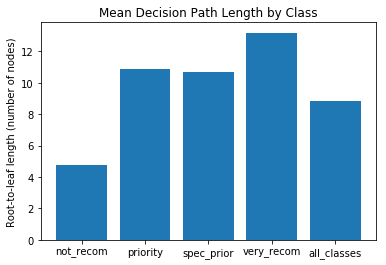

In [234]:
# comparing mean path lengths
# TO DO standard error bars
plot_mean_path_lengths(tr_correct_stats, class_labels=class_names)

The chart shows that class 'unacc' (2) has much shorter path than the others. This would indicate that it is easier to separate.

**SEE ALSO** One vs. all comparisons of complexity measures in R

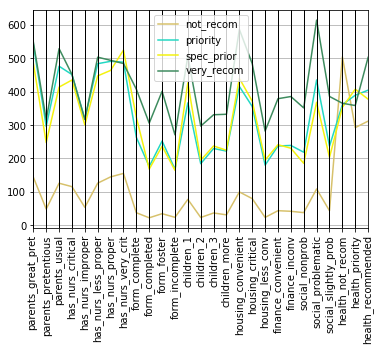

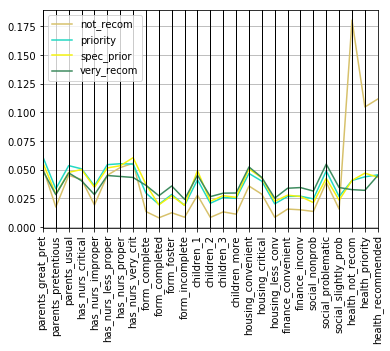

In [235]:
data = pd.DataFrame.from_dict(
    {k : tr_correct_stats[k]['m_nonroot_traversals'] for k in tr_correct_stats.keys() if k != 'all_classes'}
    , orient='index'
)
data.reset_index(level=0, inplace=True)

parallel_coordinates(data, 'index')
plt.legend(labels = get_label(class_col, [k for k in tr_correct_stats.keys() if k != 'all_classes']))
plt.xticks(range(len(onehot_features)), onehot_features, rotation='vertical')
plt.show()

data = pd.DataFrame.from_dict(
    {k : tr_correct_stats[k]['p_nonroot_traversals'] for k in tr_correct_stats.keys() if k != 'all_classes'}
    , orient='index'
)
data.reset_index(level=0, inplace=True)

parallel_coordinates(data, 'index')
plt.legend(labels = get_label(class_col, [k for k in tr_correct_stats.keys() if k != 'all_classes']))
plt.xticks(range(len(onehot_features)), onehot_features, rotation='vertical')
plt.show()

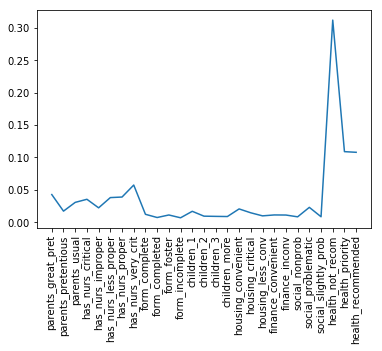

In [236]:
plt.plot(rf.feature_importances_)
plt.xticks(range(len(onehot_features)), onehot_features, rotation='vertical')
plt.show()

#### Transductive

In [237]:
########################################################################
### This takes a few minutes, so only run when an update is required ###
########################################################################

if True:
    '''
    batch = X_test
    labels = y_test

    correct_preds = enc_model.predict(batch) == labels
    incorrect_preds = enc_model.predict(batch) != labels
    
    if sum(correct_preds) > 0:
        X = batch[correct_preds.values]
        y = labels[correct_preds.values]
        
        f_survey.fit(encoder.transform(X), y, onehot_features)
        f_cor_stats = f_survey.forest_stats(np.unique(y))
        
    if sum(incorrect_preds) > 0:
        X = batch[incorrect_preds.values]
        y = labels[incorrect_preds.values]
        
        f_survey.fit(encoder.transform(X), y, onehot_features)
        f_incor_stats = f_survey.forest_stats(np.unique(y))
    
    tt_correct_stats_store = open(pickle_path('tt_correct_stats.pickle'), "wb")
    pickle.dump(f_cor_stats, tt_correct_stats_store)
    tt_correct_stats_store.close()
    
    tt_incorrect_stats_store = open(pickle_path('tt_incorrect_stats.pickle'), "wb")
    pickle.dump(f_incor_stats, tt_incorrect_stats_store)
    tt_incorrect_stats_store.close()
    '''

##### Load previously saved results

In [238]:
tt_correct_stats_store = open(pickle_path('tt_correct_stats.pickle'), "rb")
tt_correct_stats = pickle.load(tt_correct_stats_store)
tt_correct_stats_store.close()

tt_incorrect_stats_store = open(pickle_path('tt_incorrect_stats.pickle'), "rb")
tt_incorrect_stats = pickle.load(tt_incorrect_stats_store)
tt_incorrect_stats_store.close()

The test set allows useful comparisons of correctly predicted and incorrectly predicted instances.

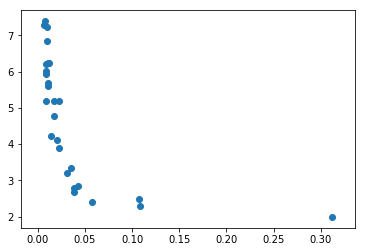

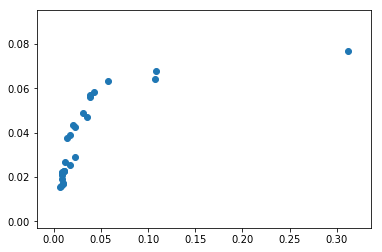

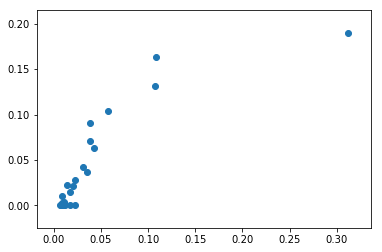

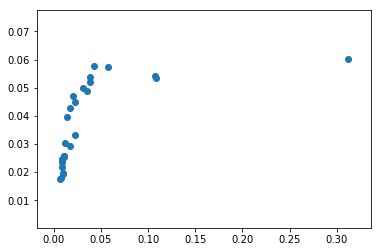

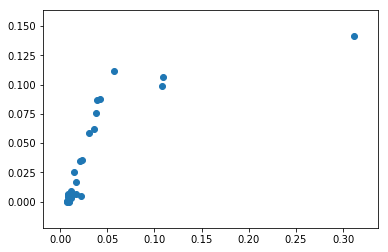

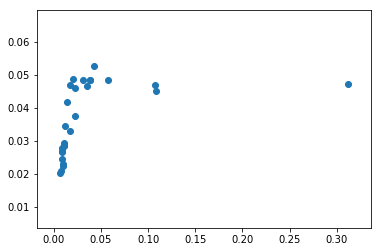

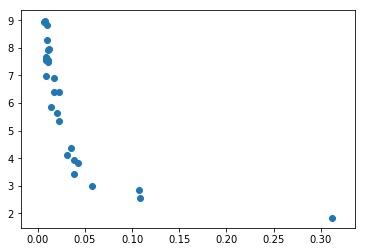

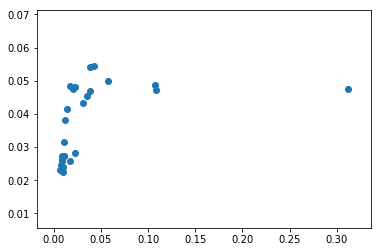

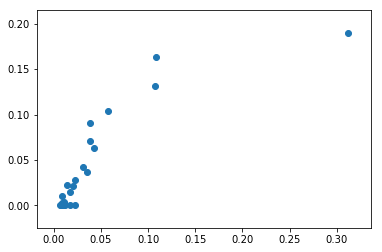

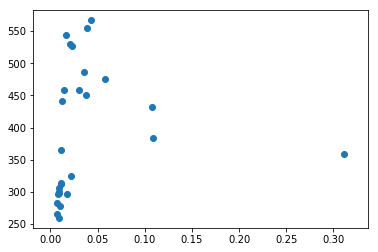

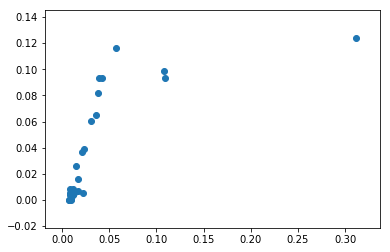

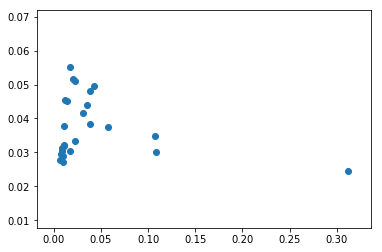

In [239]:
plt.scatter(rf.feature_importances_, tt_correct_stats['all_classes']['m_feature_depth'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats['all_classes']['p_node_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats['all_classes']['p_root_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats['all_classes']['p_nonroot_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats['all_classes']['p_child_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats['all_classes']['p_lower_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats['all_classes']['m_feature_depth'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats['all_classes']['p_node_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats['all_classes']['p_root_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats['all_classes']['m_nonroot_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats['all_classes']['p_child_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats['all_classes']['p_lower_traversals'])
plt.show()


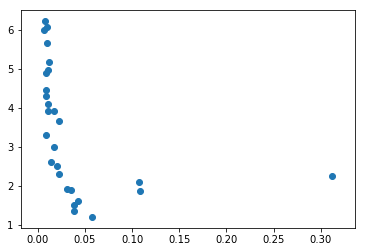

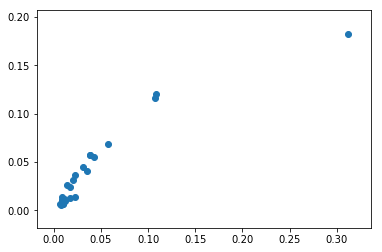

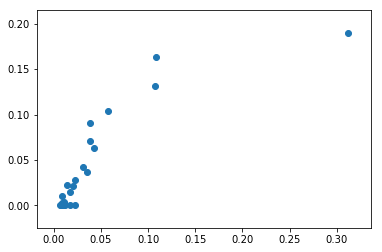

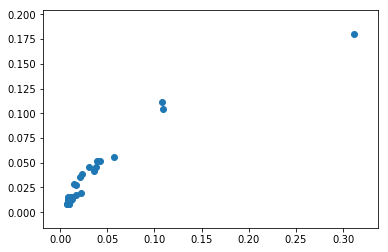

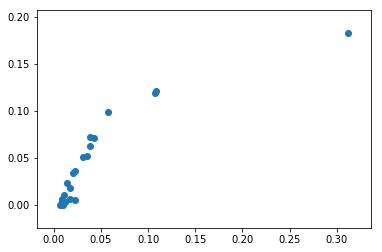

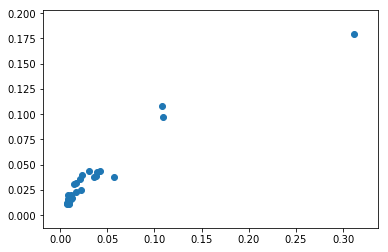

KeyError: 0

In [240]:
plt.scatter(rf.feature_importances_, tt_correct_stats[0]['m_feature_depth'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats[0]['p_node_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats[0]['p_root_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats[0]['p_nonroot_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats[0]['p_child_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats[0]['p_lower_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[0]['m_feature_depth'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[0]['p_node_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[0]['p_root_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[0]['m_nonroot_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[0]['p_child_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[0]['p_lower_traversals'])
plt.show()


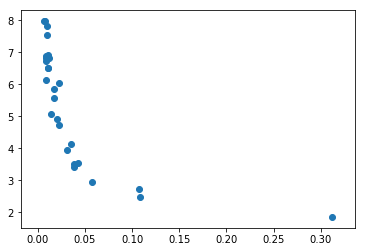

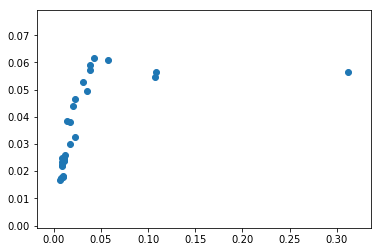

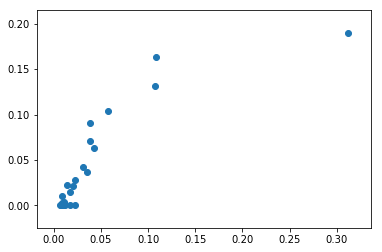

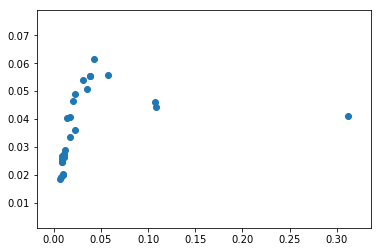

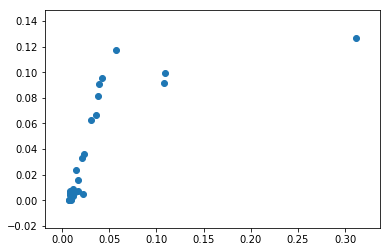

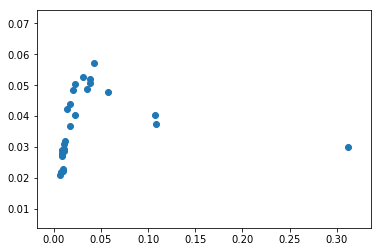

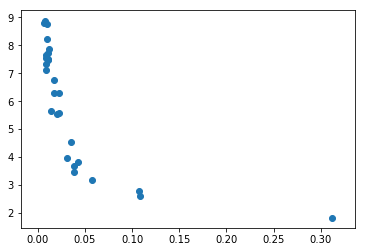

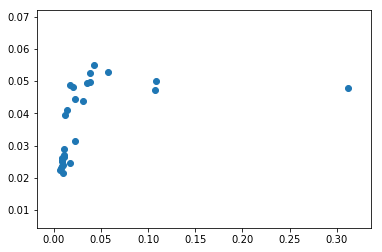

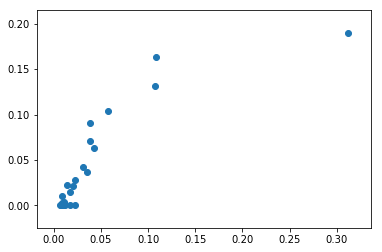

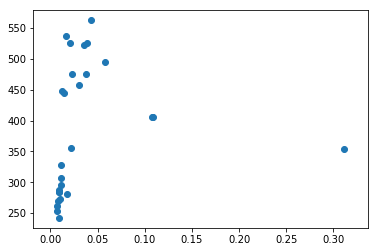

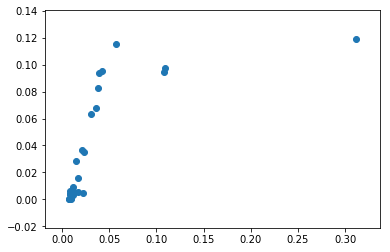

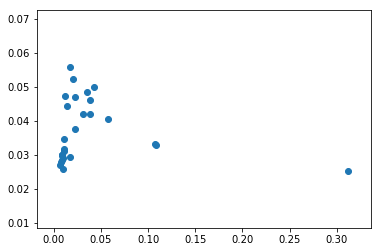

In [241]:
plt.scatter(rf.feature_importances_, tt_correct_stats[1]['m_feature_depth'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats[1]['p_node_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats[1]['p_root_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats[1]['p_nonroot_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats[1]['p_child_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats[1]['p_lower_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[1]['m_feature_depth'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[1]['p_node_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[1]['p_root_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[1]['m_nonroot_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[1]['p_child_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[1]['p_lower_traversals'])
plt.show()

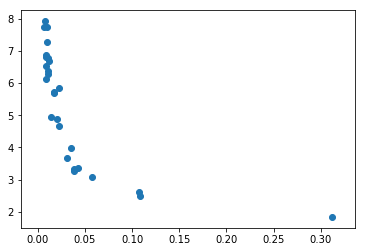

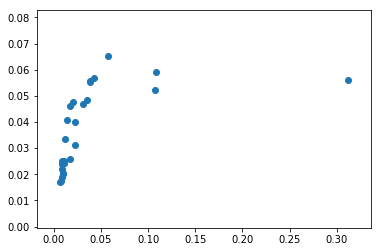

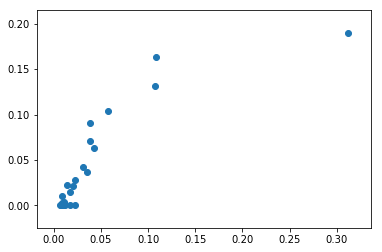

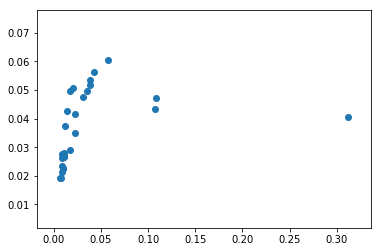

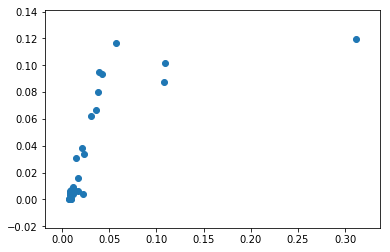

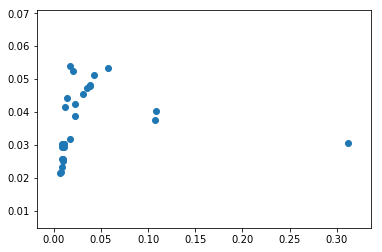

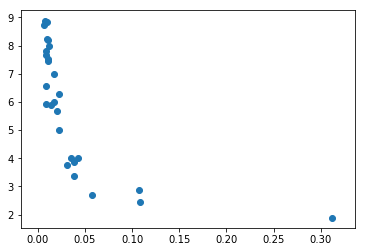

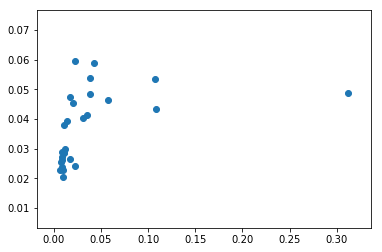

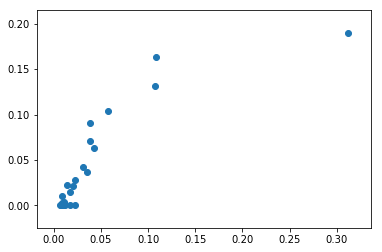

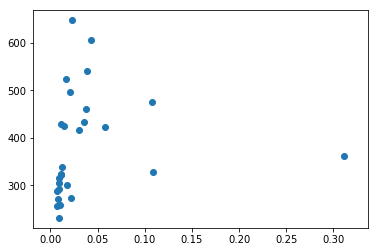

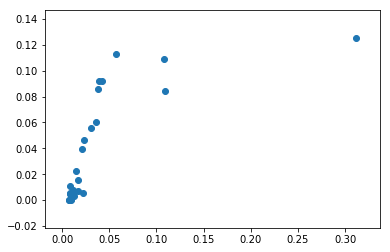

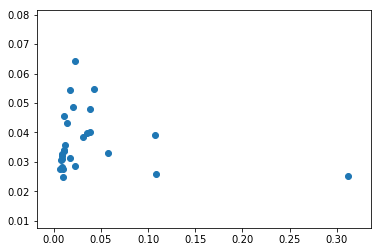

In [242]:
plt.scatter(rf.feature_importances_, tt_correct_stats[2]['m_feature_depth'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats[2]['p_node_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats[2]['p_root_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats[2]['p_nonroot_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats[2]['p_child_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats[2]['p_lower_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[2]['m_feature_depth'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[2]['p_node_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[2]['p_root_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[2]['m_nonroot_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[2]['p_child_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[2]['p_lower_traversals'])
plt.show()


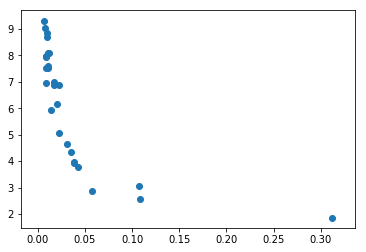

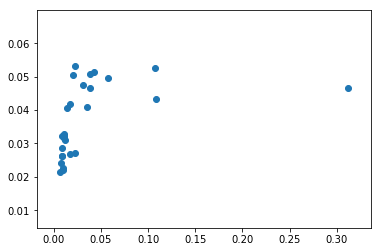

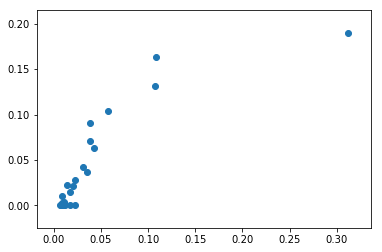

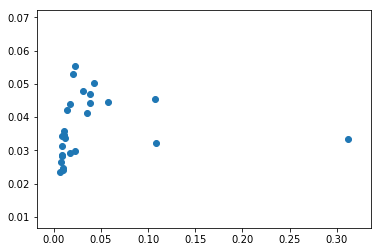

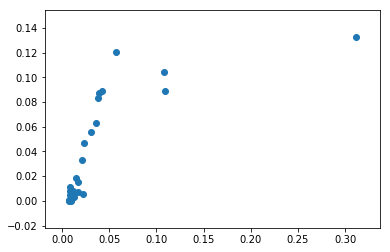

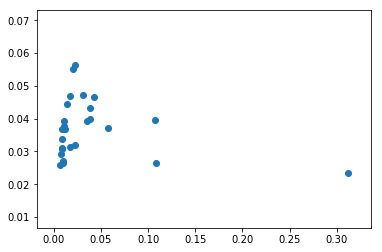

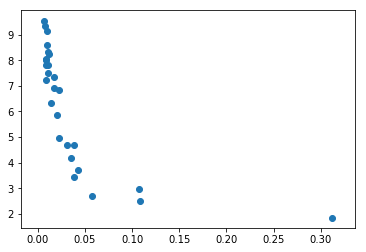

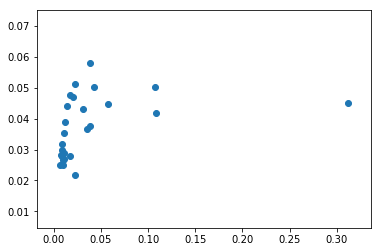

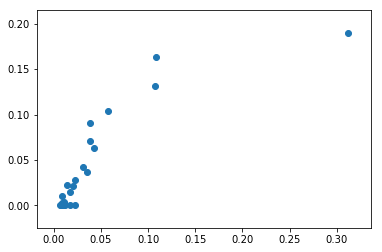

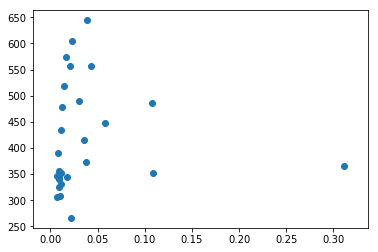

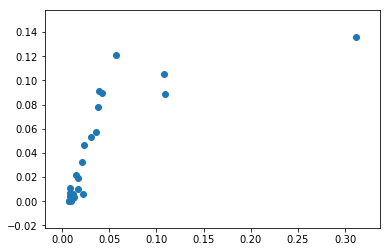

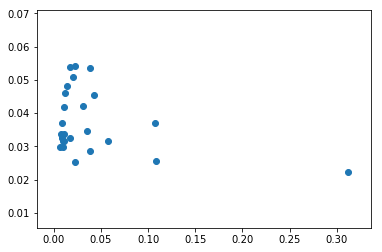

In [243]:
plt.scatter(rf.feature_importances_, tt_correct_stats[3]['m_feature_depth'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats[3]['p_node_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats[3]['p_root_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats[3]['p_nonroot_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats[3]['p_child_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_correct_stats[3]['p_lower_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[3]['m_feature_depth'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[3]['p_node_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[3]['p_root_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[3]['m_nonroot_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[3]['p_child_traversals'])
plt.show()

plt.scatter(rf.feature_importances_, tt_incorrect_stats[3]['p_lower_traversals'])
plt.show()


## Open Questions
There is a strong relationship between feature importance and feature depth, indicating that despite the randomness, feature importance exerts a pressure for a feature to be selected earlier.

Does it also mean a feature will be selected more frequently?

Is the relationship linear, or close to? Does feature depth add new information, compared to feature importance?
Feature depth is class specific. How can this be exploited?

Is this best suited to multi-class problems?

# Part 2. Local Explanations
## Analysis of decision paths for individual unseen instances in a random forest model
* Frequent Pattern Mining of decision paths
* Rule Compression of decision paths

In [244]:
first_n = 5

batch = X_test[0:first_n]
labels = y_test[0:first_n]

tfp = forest_path(forest = rf
                , feature_names = onehot_features
                , instances = batch
                , labels = labels
                , feature_encoding = encoder
                , by_tree = True)

ifp = forest_path(forest = rf
                , feature_names = onehot_features
                , instances = batch
                , labels = labels
                , feature_encoding = encoder
                , by_tree = False)

nfp = forest_path(forest = rf
                , feature_names = onehot_features
                , instances = batch
                , labels = None
                , feature_encoding = encoder
                , by_tree = False)

In [245]:
paths_0 = get_paths(nfp, 0, by_tree = False, which_trees='majority')
paths_1 = get_paths(nfp, 1, by_tree = False, which_trees='majority')
paths_2 = get_paths(nfp, 2, by_tree = False, which_trees='majority')
paths_3 = get_paths(nfp, 3, by_tree = False, which_trees='majority')
paths_4 = get_paths(nfp, 4, by_tree = False, which_trees='majority')

print("True classes:")
print()
for i in range(first_n):
    print(i, labels[i:i+1].values[0], get_label(class_col, labels[i:i+1].values[0]))

True classes:

0 2 spec_prior
1 0 not_recom
2 0 not_recom
3 0 not_recom
4 1 priority


In [246]:
# number of majority class predicting trees - could be affected by class imbalance
print(len(paths_0))
print(len(paths_1))
print(len(paths_2))
print(len(paths_3))
print(len(paths_4))

959
992
996
993
980


In [247]:
freq_patt_0 = apriori(transactions = paths_0, support = 0.3, max_itemset_size = 5)
sorted_0 = sort_fp(freq_patt_0, alpha=0)
sorted_0

No frequent patterns found longer than 1 items. Stopping early.


[((('has_nurs_very_crit', False, 0.5), ('health_priority', False, 0.5)),
  475,
  6.163314804034641),
 ((('has_nurs_very_crit', False, 0.5), ('health_not_recom', True, 0.5)),
  400,
  5.991464547107982),
 ((('has_nurs_very_crit', False, 0.5), ('health_recommended', True, 0.5)),
  341,
  5.831882477283517),
 ((('parents_great_pret', True, 0.5),), 340, 5.8289456176102075),
 ((('health_not_recom', True, 0.5), ('health_recommended', True, 0.5)),
  332,
  5.805134968916488),
 ((('has_nurs_proper', True, 0.5),), 332, 5.805134968916488),
 ((('parents_usual', False, 0.5),), 331, 5.802118375377063),
 ((('has_nurs_critical', True, 0.5),), 321, 5.771441123130016),
 ((('children_1', True, 0.5), ('has_nurs_very_crit', False, 0.5)),
  316,
  5.755742213586912),
 ((('housing_convenient', False, 0.5),), 316, 5.755742213586912),
 ((('has_nurs_less_proper', True, 0.5), ('has_nurs_very_crit', False, 0.5)),
  290,
  5.66988092298052)]

In [248]:
freq_patt_1 = apriori(transactions = paths_1, support = 0.1, max_itemset_size = 5)
sorted_1 = sort_fp(freq_patt_1, alpha=0.9)
sorted_1

No frequent patterns found longer than 2 items. Stopping early.


[((('health_priority', True, 0.5), ('health_recommended', True, 0.5)),
  208,
  2.935645943835725),
 ((('health_not_recom', False, 0.5), ('parents_great_pret', True, 0.5)),
  147,
  2.744737922728305),
 ((('health_not_recom', False, 0.5), ('health_recommended', True, 0.5)),
  140,
  2.7179033324351174),
 ((('health_recommended', True, 0.5), ('parents_great_pret', True, 0.5)),
  136,
  2.701960187154829),
 ((('has_nurs_proper', True, 0.5), ('health_not_recom', False, 0.5)),
  127,
  2.664302897552225),
 ((('has_nurs_proper', True, 0.5), ('health_recommended', True, 0.5)),
  104,
  2.5544149945277552),
 ((('has_nurs_less_proper', False, 0.5), ('health_recommended', True, 0.5)),
  102,
  2.543735047306349),
 ((('health_not_recom', True, 0.5),), 190, 0.5247024072160485),
 ((('health_priority', False, 0.5),), 163, 0.5093750200806761),
 ((('has_nurs_critical', True, 0.5),), 155, 0.5043425116919246),
 ((('has_nurs_very_crit', True, 0.5),), 142, 0.495582705760126),
 ((('social_problematic', Tr

In [249]:
freq_patt_2 = apriori(transactions = paths_2, support = 0.4, max_itemset_size = 5)
sorted_2 = sort_fp(freq_patt_2, alpha=0.4)
sorted_2

No frequent patterns found longer than 1 items. Stopping early.


[((('health_not_recom', False, 0.5),), 685, 3.917651302957335),
 ((('health_recommended', True, 0.5),), 449, 3.6642137326453526),
 ((('health_priority', True, 0.5),), 449, 3.6642137326453526)]

In [250]:
freq_patt_3 = apriori(transactions = paths_3, support = 0.2, max_itemset_size = 5)
sorted_3 = sort_fp(freq_patt_3, alpha=0.4)
sorted_3

No frequent patterns found longer than 2 items. Stopping early.


[((('health_priority', True, 0.5), ('health_recommended', True, 0.5)),
  292,
  4.541403041814625),
 ((('health_not_recom', False, 0.5),), 699, 3.929790445340286),
 ((('has_nurs_less_proper', True, 0.5),), 238, 3.283362404202885),
 ((('has_nurs_proper', True, 0.5),), 222, 3.2416064291233675)]

In [251]:
freq_patt_4 = apriori(transactions = paths_4, support = 0.1, max_itemset_size = 5)
sorted_4 = sort_fp(freq_patt_4, alpha=0.3)
sorted_4

No frequent patterns found longer than 3 items. Stopping early.


[((('health_priority', False, 0.5), ('parents_great_pret', True, 0.5)),
  254,
  4.706734126965756),
 ((('has_nurs_critical', True, 0.5), ('parents_usual', False, 0.5)),
  243,
  4.669102226839466),
 ((('health_priority', False, 0.5), ('parents_usual', False, 0.5)),
  237,
  4.647851119964861),
 ((('has_nurs_very_crit', True, 0.5), ('health_recommended', True, 0.5)),
  226,
  4.607454749381443),
 ((('has_nurs_critical', True, 0.5), ('has_nurs_less_proper', True, 0.5)),
  221,
  4.588438296290089),
 ((('has_nurs_critical', True, 0.5), ('health_priority', False, 0.5)),
  208,
  4.53690736774612),
 ((('has_nurs_very_crit', True, 0.5), ('health_not_recom', True, 0.5)),
  205,
  4.524558482267647),
 ((('has_nurs_proper', False, 0.5), ('health_not_recom', True, 0.5)),
  199,
  4.499309101015818),
 ((('has_nurs_less_proper', True, 0.5),
   ('has_nurs_proper', False, 0.5),
   ('parents_great_pret', True, 0.5)),
  145,
  4.479060368178517),
 ((('has_nurs_critical', True, 0.5),
   ('has_nurs_imp

In [252]:
n_trees = best_params['n_estimators']
n_classes = len(class_names)
instance = 0

ra = rule_accumulator(vars_dict=vars_dict, onehot_dict = onehot_dict, rule_list=sorted_0)

# prior
pri_and_post = [test_priors.values]

# model posterior
model_votes = p_count([nfp[instance][t]['pred_class'] for t in range(n_trees)])
model_post = np.empty(n_classes)
for cn in range(n_classes):
    if cn in model_votes['labels']:
        model_post[cn] = model_votes['p_counts'][np.where(model_votes['labels'] == cn)][0]
    else:
        model_post[cn] = 0.0
        
model_entropy = entropy(model_post)

# rule posteriors
previous_entropy = entropy([1 / n_classes] * n_classes)
current_entropy = entropy(pri_and_post[0])
prior_information = [previous_entropy - current_entropy]
information_gain = []
while current_entropy < previous_entropy and current_entropy > model_entropy and current_entropy > 0:
    ra.add_rule(p_total = 0.5)
    p_counts = p_count(y_train.loc[apply_rule(ra.rule, encoder.transform(X_train), onehot_features)].values)
    post = np.empty(n_classes)
    for cn in range(n_classes):
        if cn in p_counts['labels']:
            post[cn] = p_counts['p_counts'][np.where(p_counts['labels'] == cn)][0]
        else:
            post[cn] = 0.0
    # append the results to the array
    previous_entropy = current_entropy
    current_entropy = entropy(post)
    information_gain.append(previous_entropy - current_entropy)
    pri_and_post = np.append(pri_and_post, [post], axis=0)

print(pri_and_post)
print(ra.rule)

[[ 0.33641975  0.32638889  0.3122428   0.02494856]
 [ 0.          0.01482702  0.98517298  0.        ]]
[('has_nurs_very_crit', False, 0.5), ('health_priority', False, 0.5)]


In [253]:
print(current_entropy, previous_entropy, model_entropy)

0.0771576344557 1.18746682919 0.179100539609


In [254]:
print(information_gain)
print(sum(information_gain))
print(sum(information_gain, prior_information)[0])
print(entropy([1 / n_classes] * n_classes)) # maximum entropy for this number of classes

[1.1103091947386148]
1.11030919474
1.30913672666
1.38629436112



## Open Questions
Frequent pattern mining must also be affected by number of trees and their diversity. Very variable solutions might generate many FP.

It appears likely to be necessary to test with the value of each feature in FP was actually true or false, in order to increase the significance of the pattern.

Support must play a key role in finding good quality information, but do we select the optimum? Does it relate to the tuning parameters of the model?

Would it make sense to try mining the frequent patterns of multiple instances of the same class (inductive/transductive mode)?

How important is ordering, as long as you have the same frequent patterns appearing? We could randomly switch the position of nodes and measure the performance difference.

# Part 3. Generative Models?

In [352]:
[i for i, (f, t) in enumerate(zip(var_names, vars_types)) if t == 'nominal' and vars_dict[f]['class_col'] == False]

[1, 3, 5, 6, 7, 8, 9, 13]

In [354]:
# one hot encoding required for classifier
# otherwise integer vectors will be treated as ordinal
# OneHotEncoder takes an integer list as an argument to state which columns to encode
encoder = OneHotEncoder(categorical_features=[i for i, (f, t) in enumerate(zip(var_names, vars_types)) if t == 'nominal' and vars_dict[f]['class_col'] == False]) 
encoder.fit(census_pre.as_matrix())
X_train_enc = encoder.transform(X_train)

X_train_enc

<34189x108 sparse matrix of type '<class 'numpy.float64'>'
	with 414682 stored elements in COOrdinate format>

In [334]:
# train test splitting
X, y = census_pre[features], census_pre[class_col]

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed)

train_priors = y_train.value_counts().sort_index()/len(y_train)
test_priors = y_test.value_counts().sort_index()/len(y_test)


In [336]:
X_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
7916,28,4,142764,11,9,4,7,1,4,1,0,0,48,39
26447,23,4,69847,9,13,4,10,3,1,0,0,0,20,39
20889,51,4,115066,15,10,0,1,4,4,0,0,2547,40,39
30145,65,6,28367,11,9,2,12,0,4,1,0,0,55,39
7473,35,4,223514,9,13,2,1,5,2,0,0,0,40,39
29361,46,4,164427,11,9,0,1,3,4,0,0,0,45,39
12277,24,4,99970,9,13,4,13,3,4,1,0,0,40,39
11811,48,2,116601,12,14,0,10,4,1,0,0,0,50,27
32291,59,0,120617,15,10,4,0,1,2,0,0,0,40,39
11850,52,6,182187,11,9,2,14,0,2,1,0,0,40,14
